In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette("Paired"))

In [2]:
data = pd.read_csv('../data/titanic.csv')
data.shape

(887, 8)

In [3]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


There does not seem to be any non-null data in the dataset.

| Variable  | Definition | Comment |
| ------------- | ------------- | ------- |
| Survived | Survival  | 0 = No, 1 = Yes |
| Pclass  | Ticket class  | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Sex     | Passenger gender | male, female |
| Age     | Passgenger age    | int64  |
| Siblings/Spouses Aboard | # of siblings / spouses aboard the Titanic | int64 |
| Parents/Children Aboard | # of parents / children aboard the Titanic | int64 |
| Fare    | Passenger Fare | float64 | 

In [5]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


# Variables at quick glance
- **Survived** : Approximately 25-50% of the passengers survived, need to analyze further.
- **Pclass** : Approximately 50-75% of the passengers bought 3rd class tickets for the journey.
- **Age** : Passgenger age varied from infants to the age of 80. The IQR is ~18 years, the central 50% of passengers were aged between 20 and 38 years.
- **Fare** : The minimum and maximum fare paid was 0 and 512 with the average being 32.3 and median of 14.5

In [6]:
data.sample(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
58,0,3,Master. William Frederick Goodwin,male,11.0,5,2,46.900
269,1,3,Mr. William Henry Tornquist,male,25.0,0,0,0.000
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.075
473,0,2,Mr. Peter Henry Renouf,male,34.0,1,0,21.000
341,0,2,Mr. Charles Frederick Waddington Sedgwick,male,25.0,0,0,13.000


## Binning `Fare` into Discrete Categories (`Fare_Class`)

In [7]:
data['Fare'].describe()

count    887.00000
mean      32.30542
std       49.78204
min        0.00000
25%        7.92500
50%       14.45420
75%       31.13750
max      512.32920
Name: Fare, dtype: float64

(0, 200)

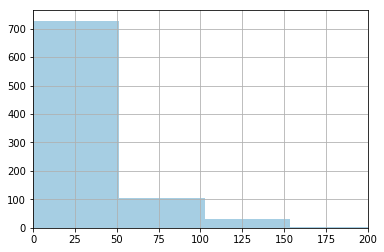

In [8]:
data['Fare'].hist()

# Ignoring some outlier data
plt.xlim(0,200)

In [9]:
# 0 - 25    : Low Fare
# 26 - 75  : Medium Fare
# 76 - Max : High Fare

data['Fare_Class'] = pd.cut(data['Fare'], bins = [-1,25,75,data['Fare'].max()], labels=['Low','Medium','High'])

Text(0.5, 1.0, 'Frequency Distribution of fare ticket class')

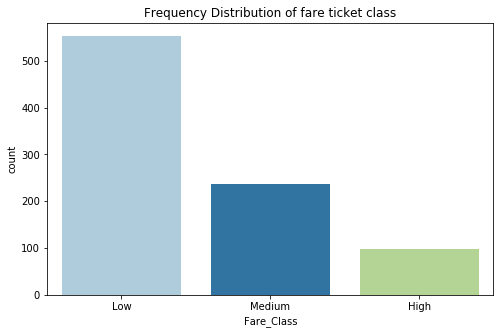

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'Fare_Class', data = data)
plt.title('Frequency Distribution of fare ticket class')

# Counts of Some Categorical Variables

In [11]:
survived_counts = pd.DataFrame(data['Survived'].value_counts(normalize=True)*100).reset_index().round(3)
survived_counts.columns = ['Survived','Percentage']
survived_counts

,Survived,Percentage
0,0,61.443
1,1,38.557


In [12]:
sex_counts = pd.DataFrame((data['Sex'].value_counts(normalize=True)*100).sort_index()).reset_index().round(3)
sex_counts.columns = ['Sex','Percentage']
sex_counts

,Sex,Percentage
0,female,35.4
1,male,64.6


In [13]:
pclass_counts = pd.DataFrame((data['Pclass'].value_counts(normalize=True)*100).sort_index()).reset_index().round(3)
pclass_counts.columns = ['Pclass','Percentage']
pclass_counts

,Pclass,Percentage
0,1,24.352
1,2,20.744
2,3,54.904


In [14]:
fare_counts = pd.DataFrame((data['Fare_Class'].value_counts(normalize=True)*100).sort_index()).reset_index().round(3)
fare_counts.columns = ['Fare_Class','Percentage']
fare_counts

,Fare_Class,Percentage
0,Low,62.345
1,Medium,26.719
2,High,10.936


In [15]:
first_class = data[data['Fare_Class'] == 'High']
first_class.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,97.000000,97.0,97.000000,97.000000,97.000000,97.000000
mean,0.762887,1.0,35.370309,0.628866,0.608247,139.612327
std,0.427522,0.0,14.399126,0.711799,0.860677,88.259168
min,0.000000,1.0,0.920000,0.000000,0.000000,75.250000
25%,1.000000,1.0,24.000000,0.000000,0.000000,82.170800
50%,1.000000,1.0,36.000000,1.000000,0.000000,110.883300
75%,1.000000,1.0,46.000000,1.000000,1.000000,153.462500
max,1.000000,1.0,64.000000,3.000000,4.000000,512.329200


In [16]:
third_class = data[data['Fare_Class'] == 'Low']
third_class.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,0.289331,2.768535,27.517034,0.247740,0.184448,10.672558
std,0.453862,0.447158,11.940423,0.563149,0.523343,4.830706
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,20.000000,0.000000,0.000000,7.750000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,8.050000
75%,1.000000,3.000000,33.000000,0.000000,0.000000,13.000000
max,1.000000,3.000000,74.000000,4.000000,4.000000,24.150000


In [17]:
perc_df = (data['Survived'].groupby(data['Fare_Class']).value_counts(normalize=True)*100).rename('Perc').reset_index().round(3)

In [18]:
perc_df

,Fare_Class,Survived,Perc
0,Low,0,71.067
1,Low,1,28.933
2,Medium,0,54.430
3,Medium,1,45.570
4,High,1,76.289
5,High,0,23.711


# Differences in High & Low Class
- **More than 75%** of high class passengers survived while **around 30%** survived from low class.
- Average fare paid for the two classes was 140 and 11.


# Survival Rates Based on Fare Paid Using `Fare_Class`

Text(0.5, 1.0, 'Survival Rates as a Function of Fare Class')

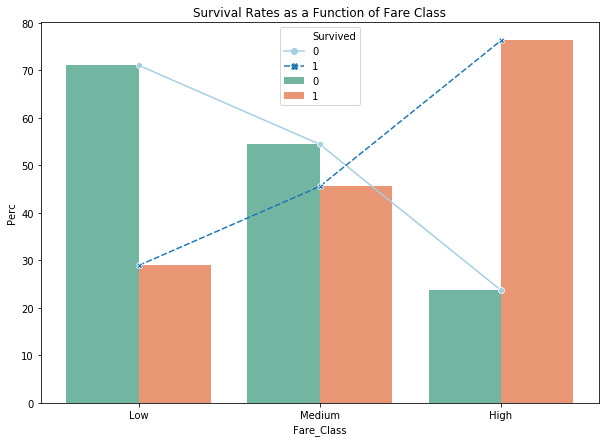

In [19]:
plt.figure(figsize=(10,7))
sns.barplot(x='Fare_Class', y='Perc', hue='Survived', data=perc_df, palette=sns.color_palette("Set2"))
sns.lineplot(x='Fare_Class', y='Perc', hue='Survived', style='Survived', markers=True, data=perc_df)

plt.title('Survival Rates as a Function of Fare Class')

It can be clearly seen that the probability of surviving has a **strong relationship** with class of a ticket.

In [20]:
sorted_by_fare = data.sort_values('Fare')
sorted_by_fare.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Fare_Class
275,0,2,Mr. Francis Parkes,male,21.0,0,0,0.0,Low
478,0,2,Mr. Anthony Wood Frost,male,37.0,0,0,0.0,Low
411,0,2,Mr. Alfred Fleming Cunningham,male,22.0,0,0,0.0,Low
594,0,3,Mr. Alfred Johnson,male,49.0,0,0,0.0,Low
630,0,1,Mr. William Henry Marsh Parr,male,30.0,0,0,0.0,Low


In [ ]:
sns.scatterplot(x='Fare', y='Survived', data)